In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
import pandas as pd
from sklearn.decomposition import PCA

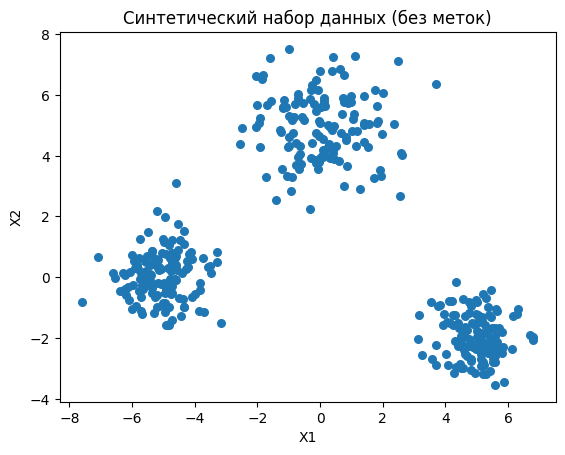

In [2]:
# создаём 3 кластера с разными центрами и разбросом
X, y_true = make_blobs(n_samples=400,
                       centers=[(-5, 0), (0, 5), (5, -2)],
                       cluster_std=[0.8, 1.2, 0.7],
                       random_state=42)

plt.scatter(X[:,0], X[:,1], s=30)
plt.title("Синтетический набор данных (без меток)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [3]:
def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None):
    rng = np.random.RandomState(random_state)
    n_samples, n_features = X.shape
    indices = rng.choice(n_samples, k, replace=False)
    centers = X[indices].astype(float)
    
    for i in range(max_iters):
        # назначаем точки к ближайшему центру
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)
        
        # пересчитываем центры
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # проверяем сходимость
        if np.linalg.norm(new_centers - centers) < tol:
            break
        centers = new_centers
        
    return labels, centers

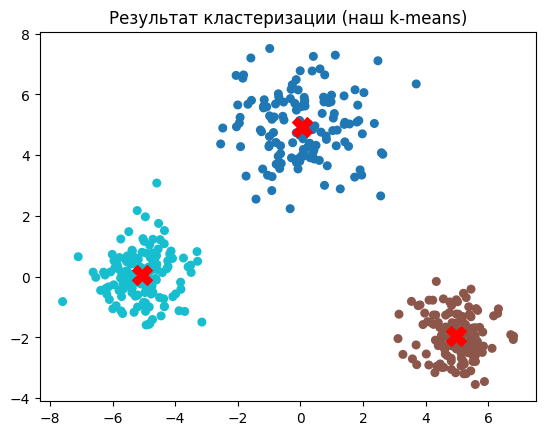

In [4]:
labels, centers = kmeans(X, k=3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=200)
plt.title("Результат кластеризации (наш k-means)")
plt.show()

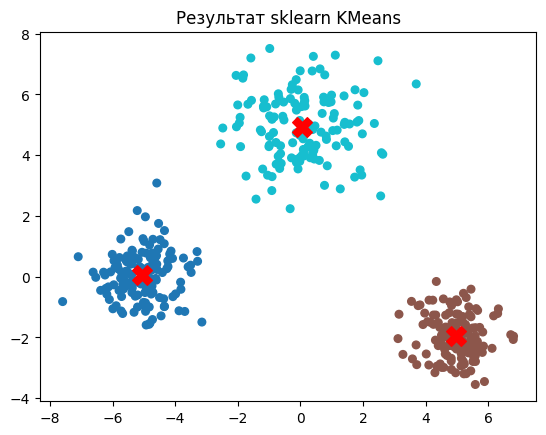

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
labels_sklearn = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels_sklearn, cmap='tab10', s=30)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("Результат sklearn KMeans")
plt.show()

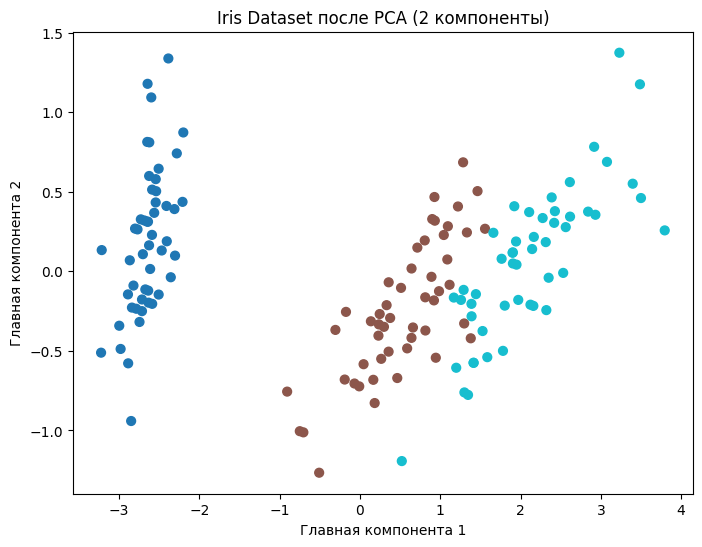

In [6]:
# Загружаем данные
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

# Применяем PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=40)
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("Iris Dataset после PCA (2 компоненты)")
plt.show()

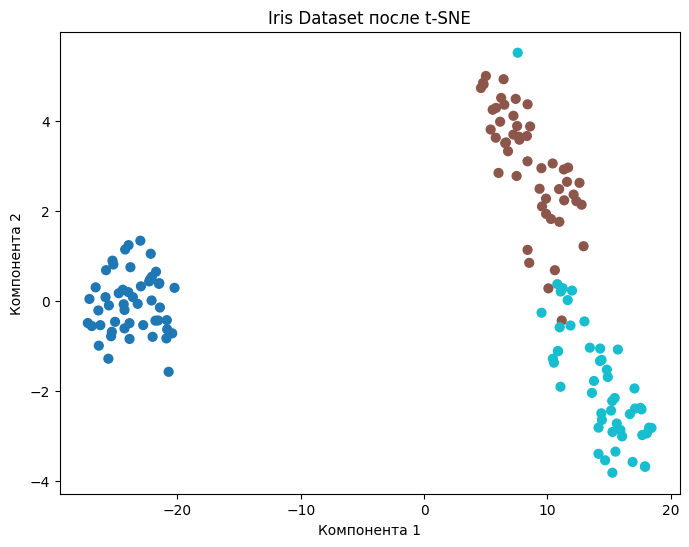

In [7]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
plt.title("Iris Dataset после t-SNE")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()